In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, SimpleRNN, Input
from tensorflow.keras.callbacks import EarlyStopping
import time
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [2]:
# Load dataset
df = pd.read_csv("C:\\Users\\user\\Downloads\\mushroom_cleaned.csv")
df.info()
df.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1


In [3]:
# Separate features and target variable
y = df['class']
x = df.drop('class', axis=1)

In [4]:

# Convert data to float32 for Keras compatibility
y = y.astype('float32')
x = x.astype('float32')

In [5]:

# Standardize the features
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)


In [6]:
# Split dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=6)

In [7]:

# Early stopping callback
es = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

In [8]:
# Evaluate model function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    
    # Fit the model
    model.fit(X_train, y_train, epochs=128, batch_size=128, validation_split=0.2, callbacks=[es])
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred = (y_pred >= 0.5).astype(int)  # Convert probabilities to binary values
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Training Time
    training_time = time.time() - start_time
    
    # Print results
    print(f"\n{model.__class__.__name__} Model:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Training Time: {training_time:.4f} seconds")
    
    # Display Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Binary classification
    disp.plot(cmap="Blues")
    plt.title(f"{model.__class__.__name__} Confusion Matrix")
    plt.show()

RNN

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7156 - loss: 0.5292 - val_accuracy: 0.8939 - val_loss: 0.2545
Epoch 2/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9115 - loss: 0.2208 - val_accuracy: 0.9385 - val_loss: 0.1555
Epoch 3/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9428 - loss: 0.1462 - val_accuracy: 0.9597 - val_loss: 0.1060
Epoch 4/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9600 - loss: 0.1061 - val_accuracy: 0.9666 - val_loss: 0.0939
Epoch 5/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9653 - loss: 0.0915 - val_accuracy: 0.9646 - val_loss: 0.0938
Epoch 6/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9697 - loss: 0.0851 - val_accuracy: 0.9709 - val_loss: 0.0847
Epoch 7/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9754 - loss: 0.0674 - val_accuracy: 0.9667 - val_loss: 0.0782
Epoch 8/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9738 - loss: 0.0724 - val_acc

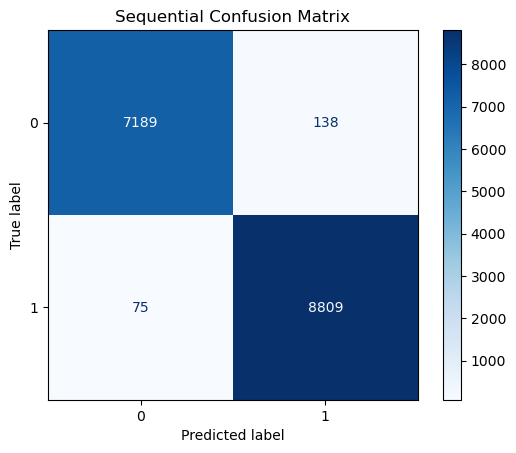

In [9]:
# 1. RNN Model
model_rnn = Sequential()

# Add RNN layer
model_rnn.add(SimpleRNN(128, activation="relu", input_shape=(x.shape[1], 1), return_sequences=True))
model_rnn.add(SimpleRNN(64, activation="relu", return_sequences=False))

# Add dense layers
model_rnn.add(Dense(32, activation="relu"))
model_rnn.add(Dense(1, activation="sigmoid"))

# Compile the RNN model
model_rnn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Reshape features for RNN input (samples, timesteps, features)
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Evaluate the RNN Model
evaluate_model(model_rnn, X_train_rnn, Y_train, X_test_rnn, Y_test)

DNN

Epoch 1/128


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6853 - loss: 0.5667 - val_accuracy: 0.8780 - val_loss: 0.2918
Epoch 2/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9013 - loss: 0.2414 - val_accuracy: 0.9350 - val_loss: 0.1723
Epoch 3/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9421 - loss: 0.1507 - val_accuracy: 0.9543 - val_loss: 0.1196
Epoch 4/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9577 - loss: 0.1091 - val_accuracy: 0.9518 - val_loss: 0.1206
Epoch 5/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9596 - loss: 0.0993 - val_accuracy: 0.9659 - val_loss: 0.0989
Epoch 6/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9694 - loss: 0.0822 - val_accuracy: 0.9699 - val_loss: 0.0791
Epoch 7/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9723 - loss: 0.0735 - val_accuracy: 0.9693 - val_loss: 0.0821
Epoch 8/128
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9743 - loss: 0.0698 - val_accuracy: 0.9762

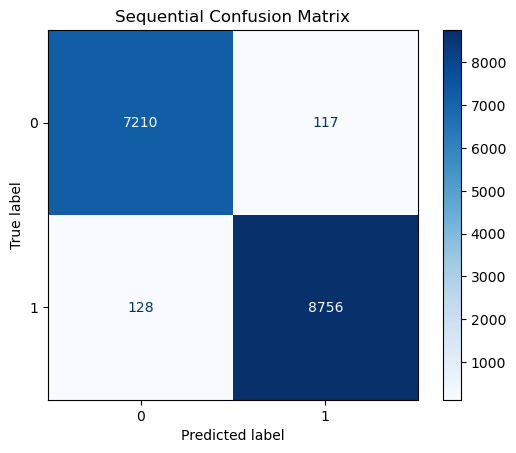

In [10]:
# 2. Dense Neural Network Model
model_dense = Sequential()

model_dense.add(Dense(128, input_dim=8, activation="relu"))
model_dense.add(Dense(64, activation="relu"))
model_dense.add(Dense(64, activation="relu"))
model_dense.add(Dense(32, activation="relu"))
model_dense.add(Dense(32, activation="relu"))
model_dense.add(Dense(1, activation="sigmoid"))

model_dense.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Evaluate the Dense Neural Network Model
evaluate_model(model_dense, X_train, Y_train, X_test, Y_test)

Autoencoder

Epoch 1/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.1169 - val_loss: 0.8598
Epoch 2/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8383 - val_loss: 0.7724
Epoch 3/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7669 - val_loss: 0.7391
Epoch 4/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7320 - val_loss: 0.6995
Epoch 5/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6969 - val_loss: 0.6880
Epoch 6/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6878 - val_loss: 0.6822
Epoch 7/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6829 - val_loss: 0.6746
Epoch 8/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6729 - val_loss: 0.6600
Epoch 9/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6613 - val_loss: 0.6525
Epoch 10/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6530 - val_loss: 0.6491
Epoch 11/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6536 - val_loss: 0.6464
Epoch 12/100
473/473 ━━━━━━━━━━━━━━━━━━━━

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6099 - loss: 0.6671 - val_accuracy: 0.6338 - val_loss: 0.6322
Epoch 2/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6421 - loss: 0.6234 - val_accuracy: 0.6646 - val_loss: 0.6153
Epoch 3/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6519 - loss: 0.6137 - val_accuracy: 0.6408 - val_loss: 0.6153
Epoch 4/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6505 - loss: 0.6111 - val_accuracy: 0.6263 - val_loss: 0.6190
Epoch 5/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6581 - loss: 0.5995 - val_accuracy: 0.6652 - val_loss: 0.6015
Epoch 6/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6691 - loss: 0.5899 - val_accuracy: 0.6740 - val_loss: 0.5862
Epoch 7/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6766 - loss: 0.5792 - val_accuracy: 0.6690 - val_loss: 0.5835
Epoch 8/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6769 - loss: 0.5765 - val_accuracy: 0.6903

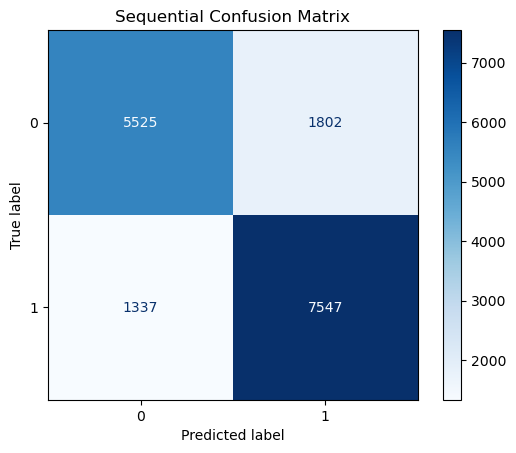

In [11]:
# 3. Autoencoder-Classifier Model
input_dim = X_train.shape[1]
encoding_dim = 4  # Compression to 4 features

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(8, activation="relu")(input_layer)
encoded = Dense(encoding_dim, activation="relu")(encoded)

# Decoder
decoded = Dense(8, activation="relu")(encoded)
decoded = Dense(input_dim, activation="sigmoid")(decoded)

# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer="adam", loss="mse")

# Encoder Model (to extract compressed features)
encoder = Model(inputs=input_layer, outputs=encoded)

# Train Autoencoder
autoencoder.fit(X_train, X_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[es])

# Compress features using the Encoder
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Classifier Model (using the compressed features)
classifier = Sequential()
classifier.add(Dense(64, input_dim=encoding_dim, activation="relu"))
classifier.add(Dense(32, activation="relu"))
classifier.add(Dense(1, activation="sigmoid"))

classifier.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train Classifier
classifier.fit(X_train_encoded, Y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[es])

# Evaluate the Classifier
evaluate_model(classifier, X_train_encoded, Y_train, X_test_encoded, Y_test)

# Artificial Neural Network (ANN) Model


In [13]:
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = ann_model.fit(X_train, Y_train, epochs=100, validation_split=0.2)


Epoch 1/100


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


946/946 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6300 - loss: 0.6316 - val_accuracy: 0.7135 - val_loss: 0.5560
Epoch 2/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7174 - loss: 0.5484 - val_accuracy: 0.7463 - val_loss: 0.5188
Epoch 3/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7459 - loss: 0.5141 - val_accuracy: 0.7626 - val_loss: 0.4908
Epoch 4/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7697 - loss: 0.4812 - val_accuracy: 0.7847 - val_loss: 0.4608
Epoch 5/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7823 - loss: 0.4591 - val_accuracy: 0.7978 - val_loss: 0.4412
Epoch 6/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7993 - loss: 0.4392 - val_accuracy: 0.8156 - val_loss: 0.4218
Epoch 7/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8197 - loss: 0.4162 - val_accuracy: 0.8311 - val_loss: 0.4027
Epoch 8/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8319 - loss: 0.3991 - val_accuracy: 0.8424

# ANN Model Performance Evaluation


In [14]:
# Evaluate ANN Model
y_pred_ann = ann_model.predict(X_test).round()  # Convert probabilities to class predictions
ann_accuracy = accuracy_score(y_test, y_pred_ann)
ann_precision = precision_score(y_test, y_pred_ann)
ann_recall = recall_score(y_test, y_pred_ann)
ann_f1 = f1_score(y_test, y_pred_ann)

# Print ANN Results
print("\nANN Model:")
print(f"Accuracy: {ann_accuracy:.4f}")
print(f"Precision: {ann_precision:.4f}")
print(f"Recall: {ann_recall:.4f}")
print(f"F1-Score: {ann_f1:.4f}")


# Display Classification Report for ANN
print("\nClassification Report (ANN):")
print(classification_report(y_test, y_pred_ann))

# Confusion Matrix for ANN
cm_ann = confusion_matrix(y_test, y_pred_ann)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ann, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap="Blues")
plt.title("ANN Confusion Matrix")
plt.show()

507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


NameError: name 'y_test' is not defined